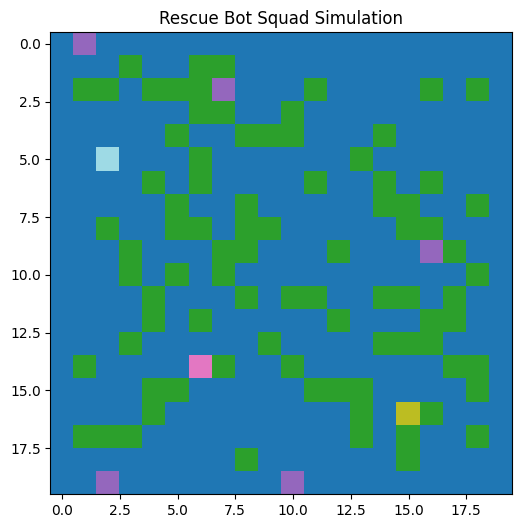

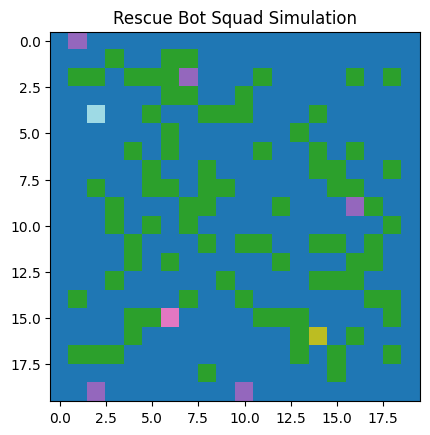

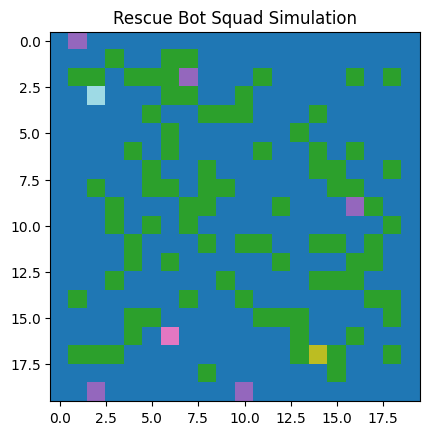

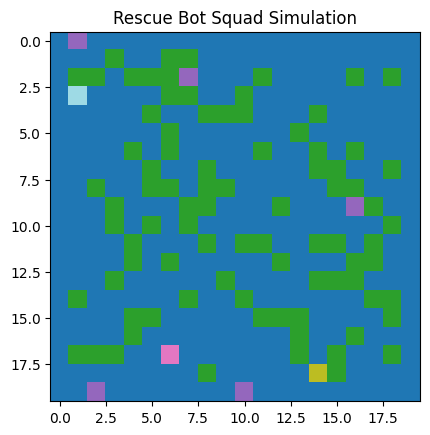

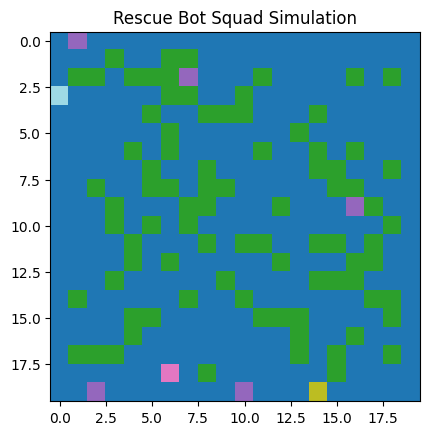

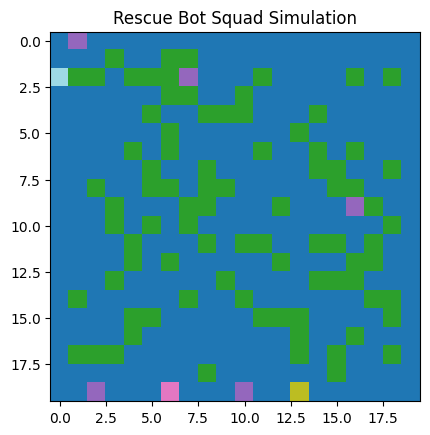

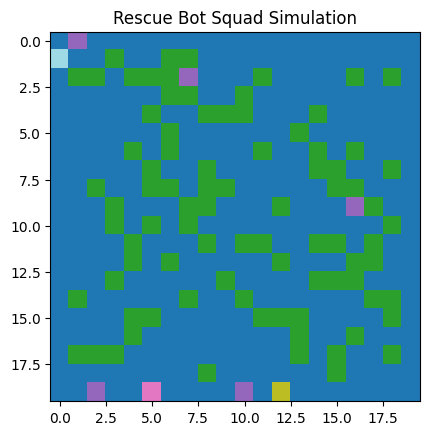

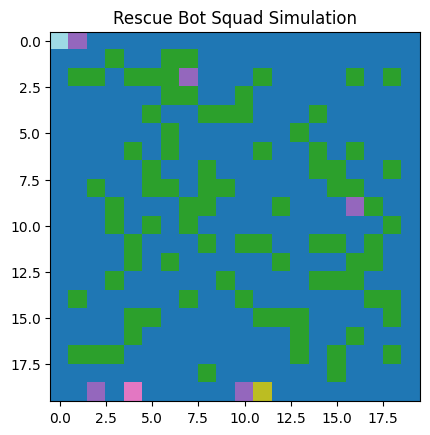

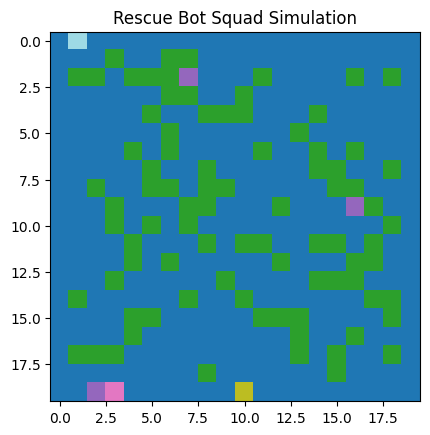

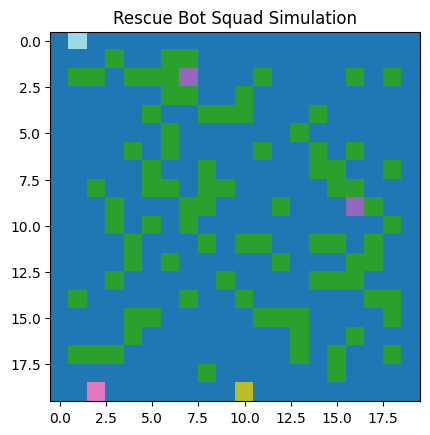

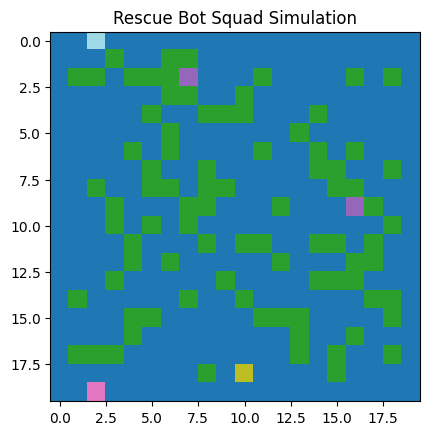

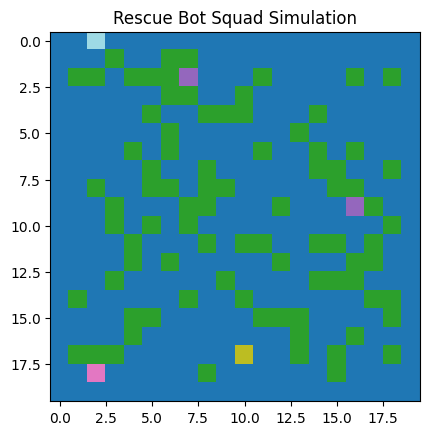

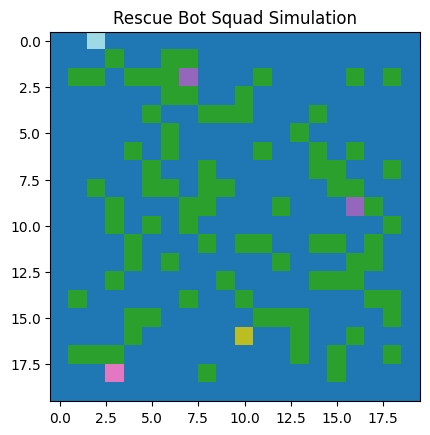

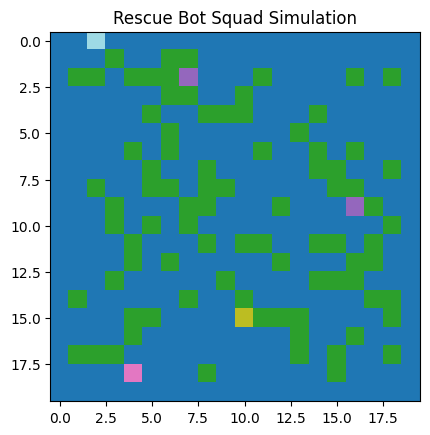

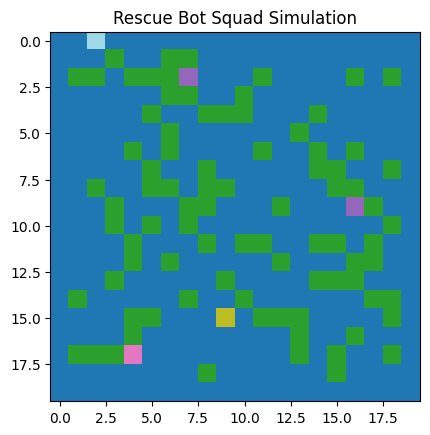

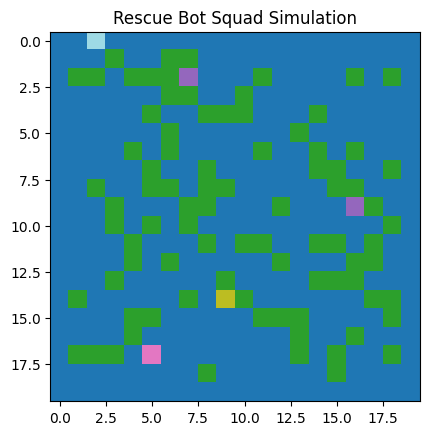

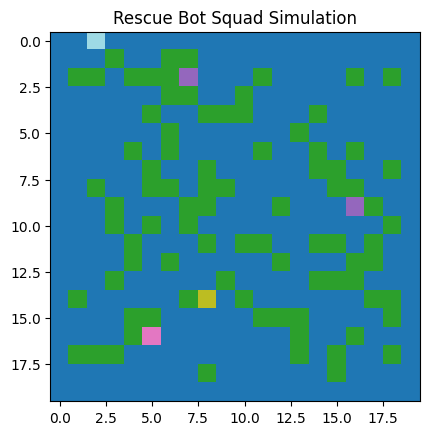

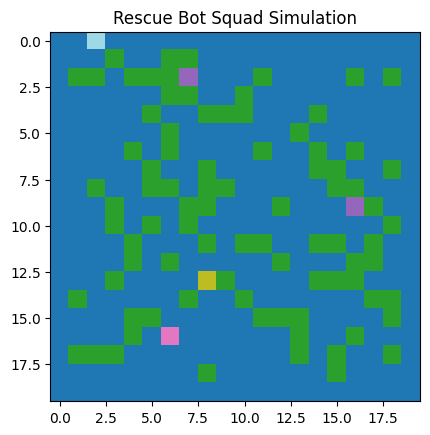

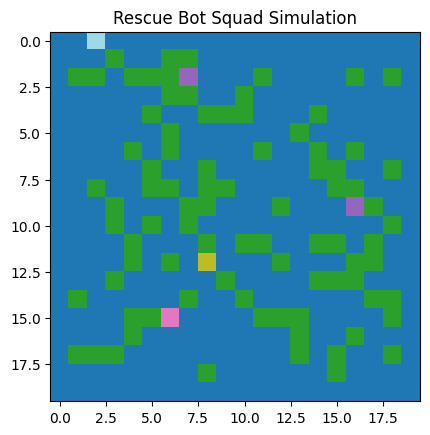

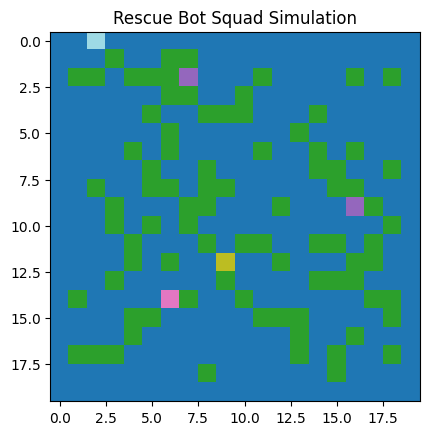

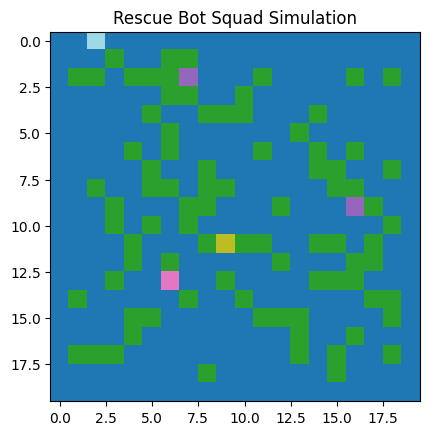

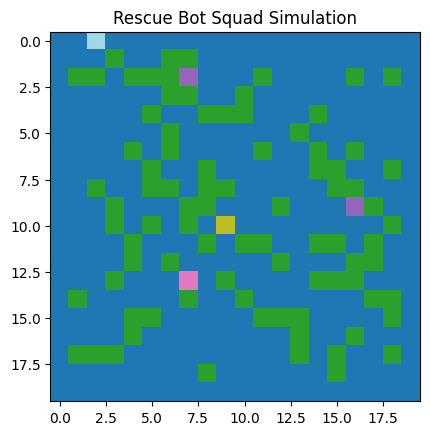

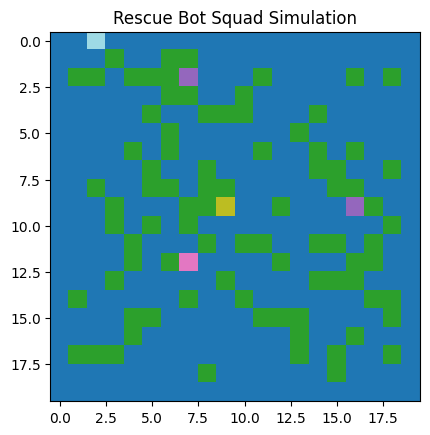

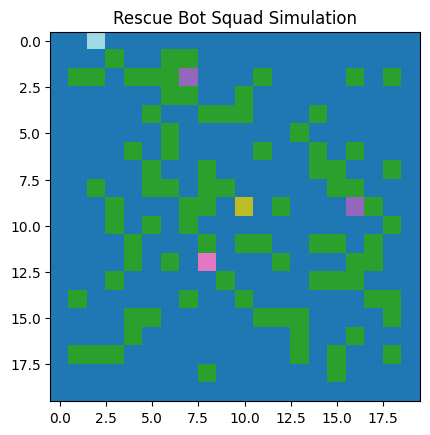

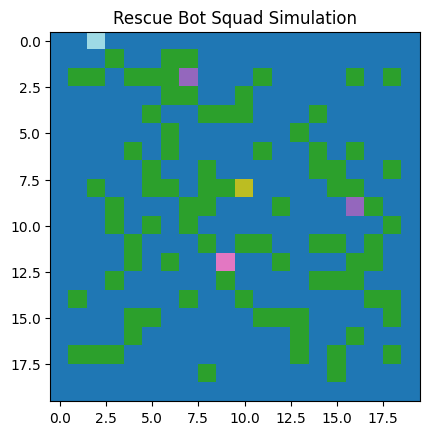

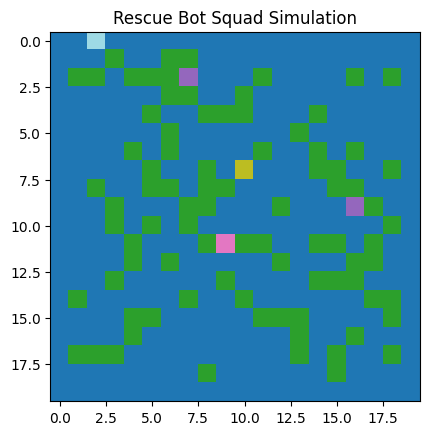

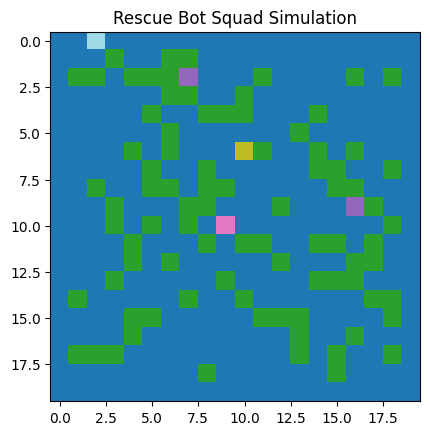

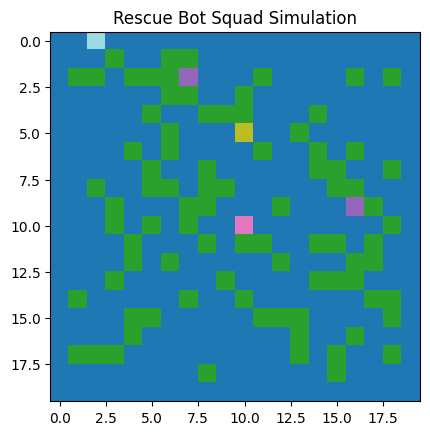

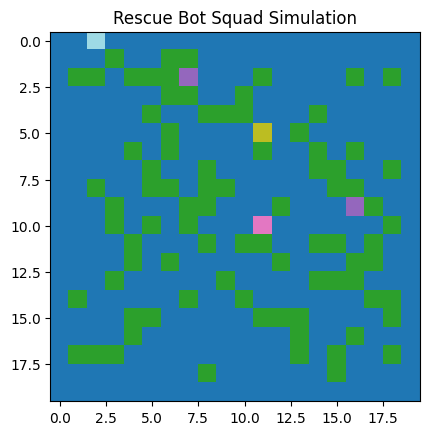

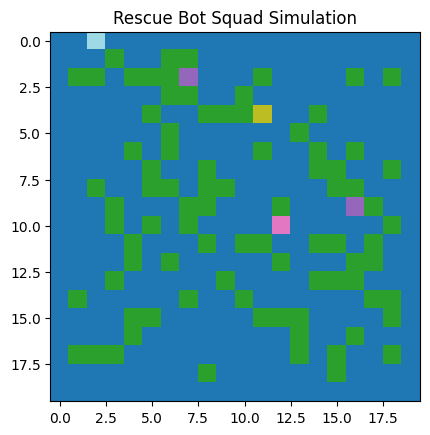

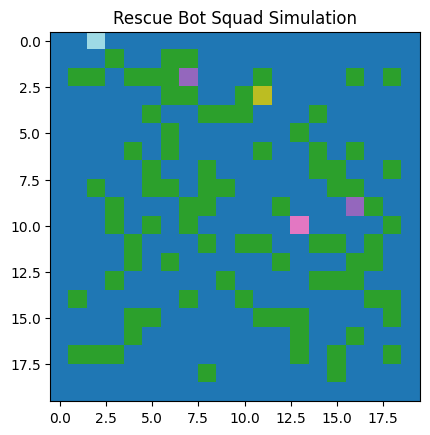

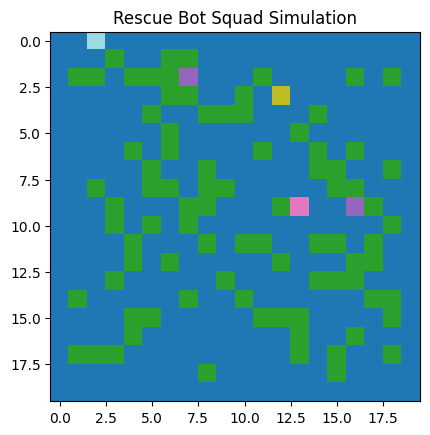

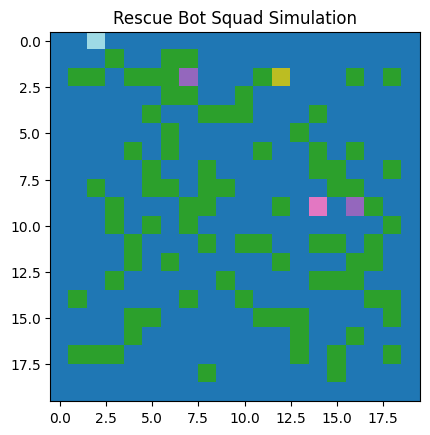

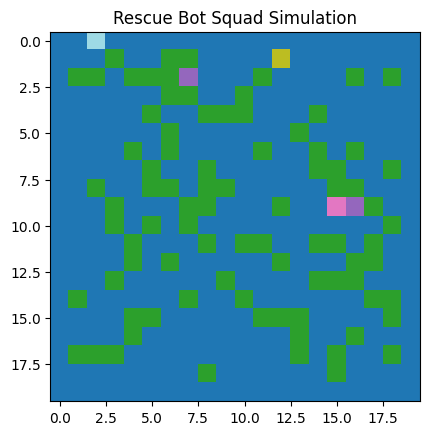

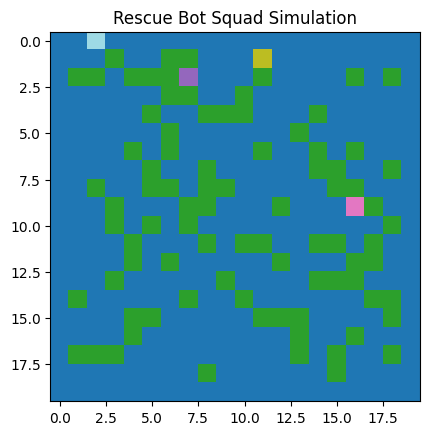

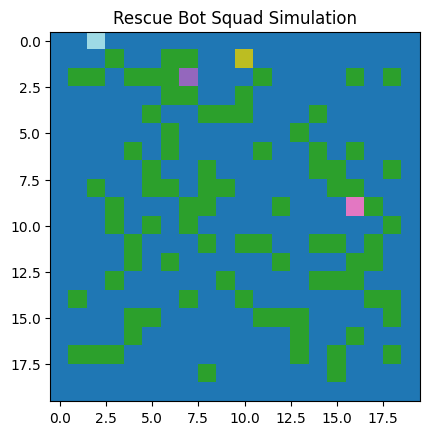

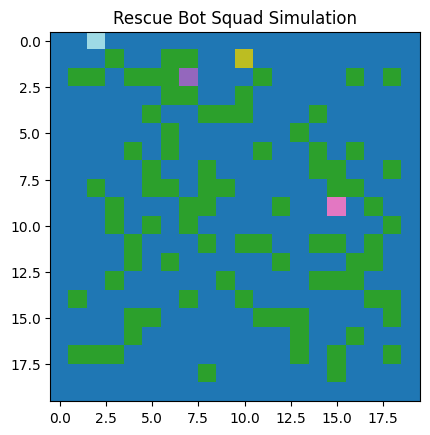

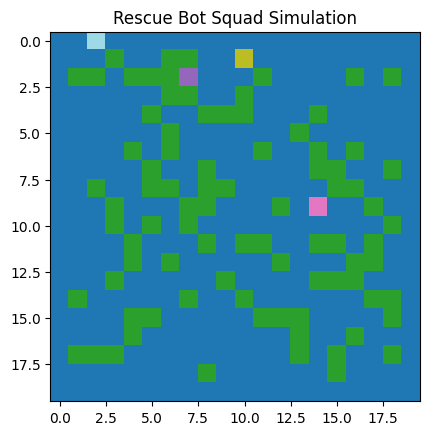

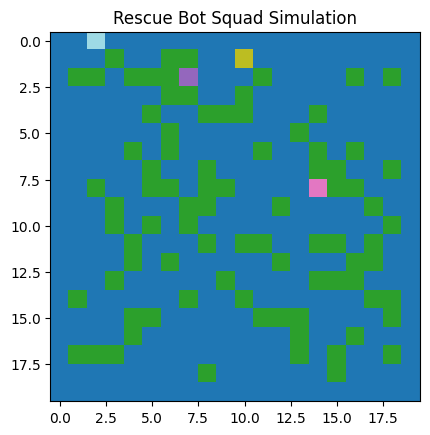

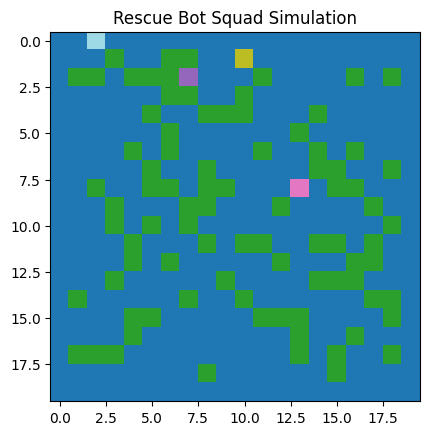

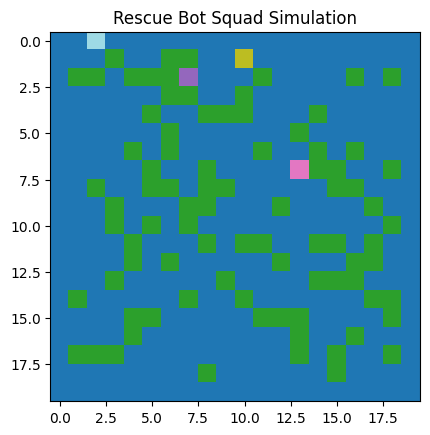

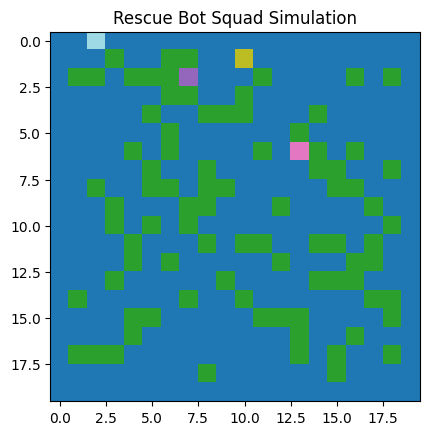

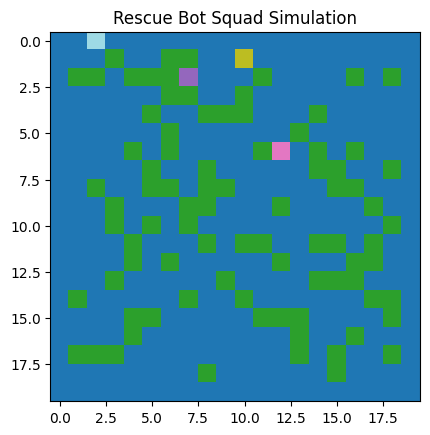

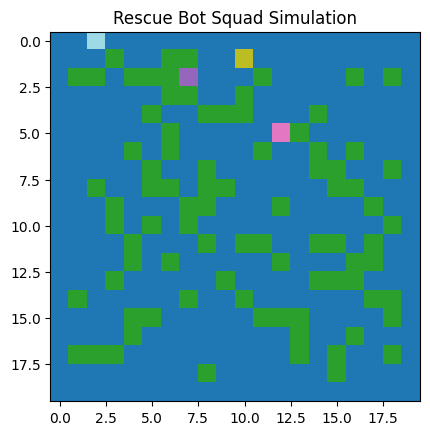

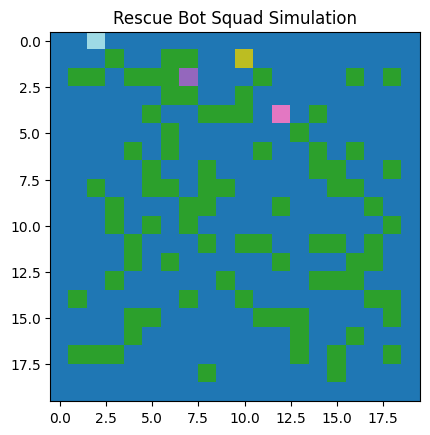

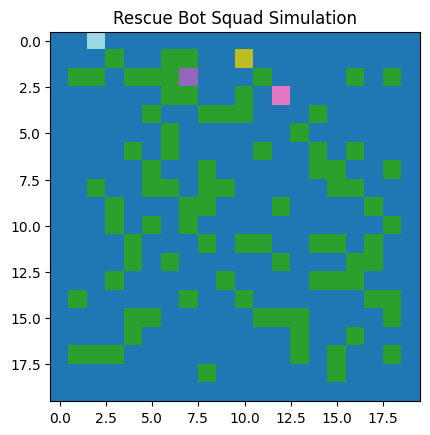

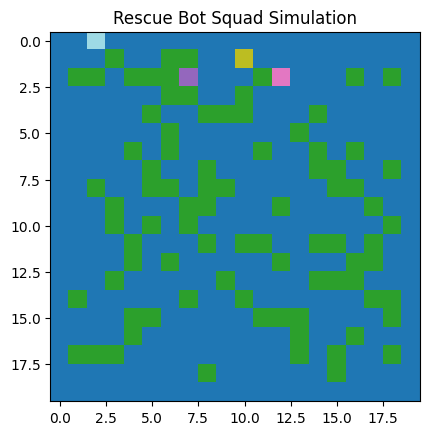

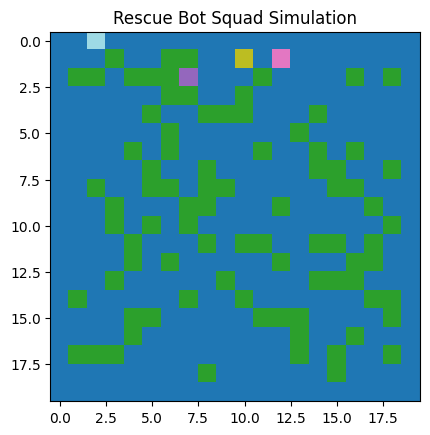

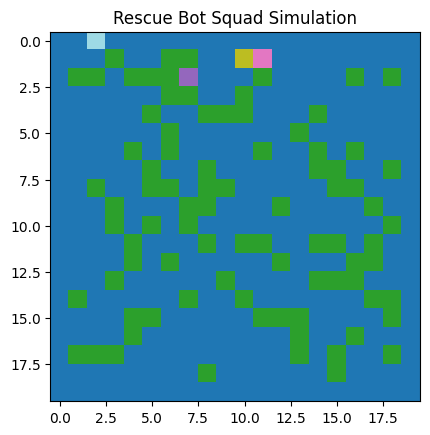

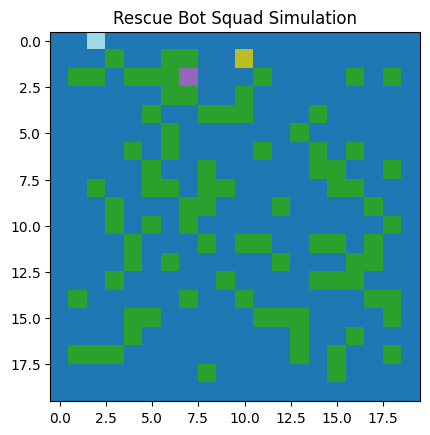

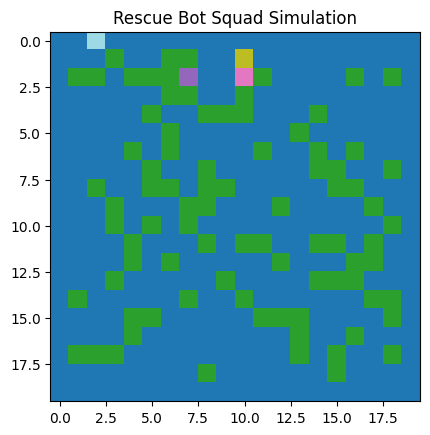

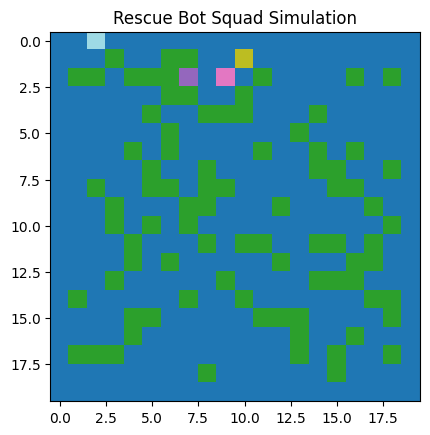

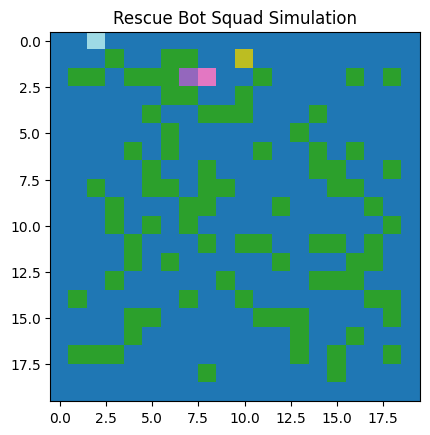

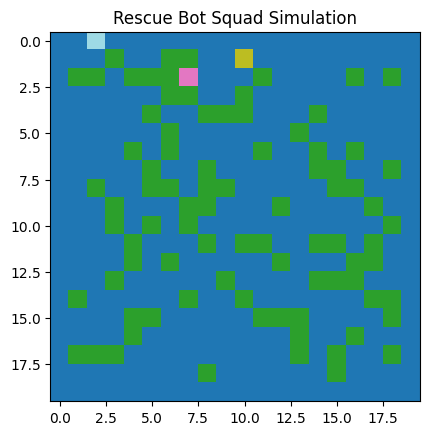

All victims rescued in 54 steps!


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import random
import time

# ------------------------------
# Generate Grid (0 = free, 1 = wall)
# ------------------------------

ROWS, COLS = 20, 20
OBSTACLE_PROB = 0.25
random.seed(42)

grid = np.zeros((ROWS, COLS), dtype=int)
for r in range(ROWS):
    for c in range(COLS):
        if random.random() < OBSTACLE_PROB:
            grid[r][c] = 1

# Keep borders free for movement
grid[0, :] = 0
grid[:, 0] = 0
grid[ROWS-1, :] = 0
grid[:, COLS-1] = 0

# ------------------------------
# Random free cell helper
# ------------------------------
def random_free_cell():
    while True:
        r, c = random.randrange(ROWS), random.randrange(COLS)
        if grid[r][c] == 0:
            return r, c

# ------------------------------
# Place agents and victims
# ------------------------------
NUM_AGENTS = 3
NUM_VICTIMS = 5

agents = []
for i in range(NUM_AGENTS):
    agents.append({
        "id": i,
        "pos": random_free_cell(),
        "target": None,
        "path": []
    })

victims = set()
while len(victims) < NUM_VICTIMS:
    victims.add(random_free_cell())


# ------------------------------
# BFS shortest path
# ------------------------------
def bfs(start, goal):
    if start == goal:
        return [start]

    q = deque([start])
    visited = {start}
    parent = {}

    while q:
        r, c = q.popleft()

        for dr, dc in [(1,0), (-1,0), (0,1), (0,-1)]:
            nr, nc = r + dr, c + dc

            if 0 <= nr < ROWS and 0 <= nc < COLS and grid[nr][nc] == 0:
                if (nr, nc) not in visited:
                    visited.add((nr, nc))
                    parent[(nr, nc)] = (r, c)

                    if (nr, nc) == goal:
                        # reconstruct path
                        path = [(nr, nc)]
                        cur = (nr, nc)
                        while cur != start:
                            cur = parent[cur]
                            path.append(cur)
                        return path[::-1]

                    q.append((nr, nc))
    return None


# ------------------------------
# Assign closest victim to each agent
# ------------------------------
def assign_targets():
    remaining = victims.copy()
    for ag in agents:
        ag["target"] = None
        ag["path"] = []

        best_target = None
        best_dist = None

        for v in remaining:
            p = bfs(ag["pos"], v)
            if p:
                if best_target is None or len(p) < best_dist:
                    best_target = v
                    best_dist = len(p)

        if best_target:
            ag["target"] = best_target
            ag["path"] = bfs(ag["pos"], best_target)
            remaining.remove(best_target)


# ------------------------------
# Visualization
# ------------------------------
def draw(grid, agents, victims):
    display = grid.copy()

    # victims = 2
    for r, c in victims:
        display[r][c] = 2

    # agents = 3,4,5,...
    for i, ag in enumerate(agents):
        r, c = ag["pos"]
        display[r][c] = 3 + i

    plt.imshow(display, cmap="tab20")
    plt.title("Rescue Bot Squad Simulation")
    plt.pause(0.2)
    plt.clf()


# ------------------------------
# MAIN SIMULATION LOOP
# ------------------------------

plt.figure(figsize=(6, 6))
assign_targets()

steps = 0
while victims:
    draw(grid, agents, victims)
    steps += 1

    for ag in agents:
        if ag["target"] is None:
            continue

        # follow path
        if len(ag["path"]) > 1:
            ag["pos"] = ag["path"][1]
            ag["path"] = ag["path"][1:]
        else:
            # rescue victim
            if ag["pos"] == ag["target"]:
                if ag["target"] in victims:
                    victims.remove(ag["target"])
            ag["target"] = None
            ag["path"] = []

    assign_targets()

plt.close()
print("All victims rescued in", steps, "steps!")